In [8]:
from tqdm.notebook import tqdm
import json
# import pandas as pd
# import polars as pl
import unicodedata

import polars as pl
import torch
# import torch.nn as nn
# import torch.optim as optim
from torch.utils.data import Dataset#, DataLoader
import numpy as np
from sentence_transformers import SentenceTransformer

import numpy as np

import matplotlib.pyplot as plt


In [10]:
df_train = pl.read_csv("data/imported/training.csv")
df_test = pl.read_csv("data/imported/testing.csv")
df_validation = pl.read_csv("data/imported/val.csv")

train_texts = df_train["text"].to_list()
train_labels = df_train["score"].to_list()

test_texts = df_test["text"].to_list()
test_labels = df_test["score"].to_list()

val_texts = df_validation["text"].to_list()
val_labels = df_validation["score"].to_list()


(array([411.,  50.,  69.,  27.,  21.,   6.,   6.,  10.,  17.,   5.]),
 array([ 0. ,  4.5,  9. , 13.5, 18. , 22.5, 27. , 31.5, 36. , 40.5, 45. ]),
 <BarContainer object of 10 artists>)

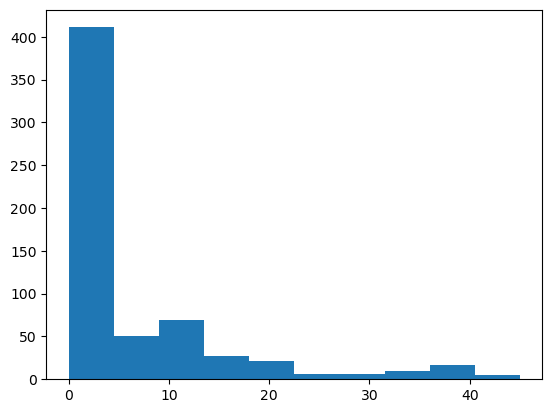

In [9]:
plt.hist(val_labels)

In [ ]:
def evaluate_model(model, loader, criterion):
    model.eval()
    running_loss = 0.0
    with torch.no_grad():
        for inputs, targets in loader:
            inputs, targets = inputs.to('cuda'), targets.to('cuda').unsqueeze(1)  # Ensure targets have shape [batch_size, 1]

            outputs = model(inputs)
            loss = criterion(outputs, targets)

            running_loss += loss.item()

    return running_loss / len(loader)


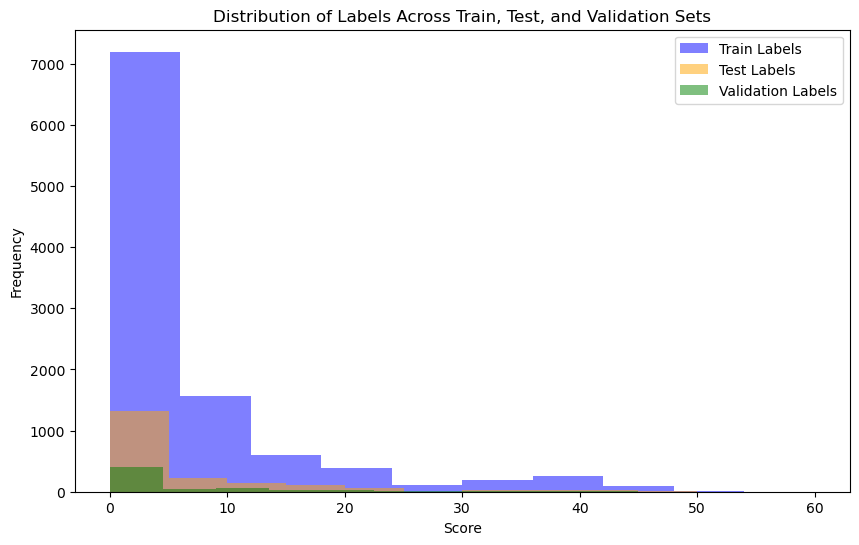

In [11]:
plt.figure(figsize=(10, 6))
plt.hist(train_labels, bins=10, alpha=0.5, label='Train Labels', color='blue')
plt.hist(test_labels, bins=10, alpha=0.5, label='Test Labels', color='orange')
plt.hist(val_labels, bins=10, alpha=0.5, label='Validation Labels', color='green')

# Add labels and legend
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.title('Distribution of Labels Across Train, Test, and Validation Sets')
plt.legend(loc='upper right')

# Show plot
plt.show()

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

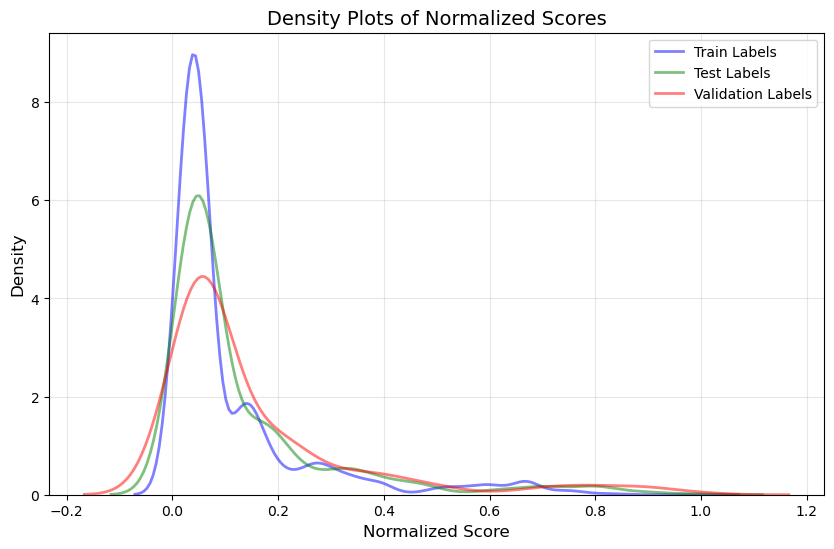

In [15]:
# Normalize each list to ensure they have the same scale
train_labels_normalized = (np.array(train_labels) - np.min(train_labels)) / (np.max(train_labels) - np.min(train_labels))
test_labels_normalized = (np.array(test_labels) - np.min(test_labels)) / (np.max(test_labels) - np.min(test_labels))
val_labels_normalized = (np.array(val_labels) - np.min(val_labels)) / (np.max(val_labels) - np.min(val_labels))

# Set up the plot
plt.figure(figsize=(10, 6))

# Plot the density plots
sns.kdeplot(train_labels_normalized, label="Train Labels", color="blue", alpha=0.5, linewidth=2)
sns.kdeplot(test_labels_normalized, label="Test Labels", color="green", alpha=0.5, linewidth=2)
sns.kdeplot(val_labels_normalized, label="Validation Labels", color="red", alpha=0.5, linewidth=2)

# Add labels and title
plt.title("Density Plots of Normalized Scores", fontsize=14)
plt.xlabel("Normalized Score", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)

# Show the plot
plt.show()

In [17]:
import polars as pl
from sklearn.metrics import mean_squared_error

# Load datasets
df_train = pl.read_csv("data/imported/training.csv")
df_test = pl.read_csv("data/imported/testing.csv")
df_validation = pl.read_csv("data/imported/val.csv")

# Extract labels
train_labels = df_train["score"].to_list()
test_labels = df_test["score"].to_list()
val_labels = df_validation["score"].to_list()

# Calculate mean of train labels
mean_train = sum(train_labels) / len(train_labels)

# Predict using the mean for test and validation sets
test_predictions = [mean_train] * len(test_labels)
val_predictions = [mean_train] * len(val_labels)

# Calculate MSE for test and validation sets
test_mse = mean_squared_error(test_labels, test_predictions)
val_mse = mean_squared_error(val_labels, val_predictions)

# Print results
print(f"Mean of train labels: {mean_train}")
print(f"Test set MSE: {test_mse}")
print(f"Validation set MSE: {val_mse}")

Mean of train labels: 6.786215514755359
Test set MSE: 77.11648217554871
Validation set MSE: 81.56741161797018


In [25]:
print(f"{np.sqrt(mean_train)=}")
print(f"{np.sqrt(test_mse)=}")
print(f"{np.sqrt(val_mse)=}")

np.sqrt(mean_train)=np.float64(2.6050365668748987)
np.sqrt(test_mse)=np.float64(8.78159906711464)
np.sqrt(val_mse)=np.float64(9.031467855114704)
